In [47]:
from datasets import load_dataset
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from spacy import displacy

In [2]:
texts = load_dataset("clarin-knext/fiqa-pl", "corpus")
df_texts = texts['corpus']
df_texts = pd.DataFrame.from_dict(df_texts)
df_texts.head(2)

,_id,title,text
0,3,,"Nie mówię, że nie podoba mi się też pomysł szk..."
1,31,,Tak więc nic nie zapobiega fałszywym ocenom po...


In [3]:
df_1000 = df_texts.sample(n=1000, random_state=2137)

In [4]:
nlp = spacy.load("pl_core_news_sm")

In [5]:
df_texts['text']= df_texts['text'].astype(str)
type(df_texts.iloc[0]['text'])

str

In [6]:
def lemmatize_text(text):
    doc = nlp(text)
    lematized_words = [token.lemma_ for token in doc]
    return " ".join(lematized_words)

In [7]:
# Lematyzowany tekst:
print(lemmatize_text(df_texts.iloc[0]['text']))

nie mówić , że nie podobać ja się też pomysł szkolenie w miejsce praca , ale nie móc oczekiwać , że firma to zrobić . szkolenie pracownik to nie on praca – on tworzyć oprogramowanie . być może system edukacyjny w Stany Zjednoczone ( lub on student ) powinien trochę martwić się o zdobycie umiejętność rynkowy w zamian za on ogromny inwestycja w edukacja , zamiast wychodzić z tysiąc zadłużoć student i narzekać , że nie być do nic wykwalifikować .


In [8]:
# surowy tekst
df_texts.iloc[0]['text']

'Nie mówię, że nie podoba mi się też pomysł szkolenia w miejscu pracy, ale nie możesz oczekiwać, że firma to zrobi. Szkolenie pracowników to nie ich praca – oni tworzą oprogramowanie. Być może systemy edukacyjne w Stanach Zjednoczonych (lub ich studenci) powinny trochę martwić się o zdobycie umiejętności rynkowych w zamian za ich ogromne inwestycje w edukację, zamiast wychodzić z tysiącami zadłużonych studentów i narzekać, że nie są do niczego wykwalifikowani.'

In [9]:
df_1000['text_lemmat'] = df_1000['text'].apply(lemmatize_text)

In [10]:
df_1000.head(3)

,_id,title,text,text_lemmat
47960,498437,,"Domyślam się, że do tej pory budowanie w górę ...","Domyślam się , że do ten pora budować w góra b..."
34367,356387,,* Bojack = okropne * Mindhunter = dobrze * Duż...,* Bojack = okropny * mindhunter = dobrze * duż...
14705,151504,,"Pieniądze mnie cholernie stresują, trudno nie ...","pieniądz ja cholernie stresować , trudno nie b..."


In [11]:
def get_capital_expressions(text):
    doc = nlp(text)
    expressions = []
    expression = ""
    # every doc between sentences
    for sentence in doc.sents:
        # skip first word as it is always capital
        for token in sentence[1:]:
            if token.is_title:
                expression += str(token)
                expression += " "
            # If there are two (or more) capital words e.g. Stanów Zjednoczonych
            elif not token.is_title and len(expression) > 0:
                expressions.append(expression)
                expression = ""
    return expressions
        

In [12]:
get_capital_expressions('Wczoraj w Krakowie miało miejsce spotkanie prezydentów Polski i Stanów Zjednoczonych. Cos na Testa biore.')

['Krakowie ', 'Polski ', 'Stanów Zjednoczonych ', 'Testa ']

In [13]:
df_1000['expressions'] = df_1000['text_lemmat'].apply(get_capital_expressions)

In [14]:
df_1000.head(5)

,_id,title,text,text_lemmat,expressions
47960,498437,,"Domyślam się, że do tej pory budowanie w górę ...","Domyślam się , że do ten pora budować w góra b...",[]
34367,356387,,* Bojack = okropne * Mindhunter = dobrze * Duż...,* Bojack = okropny * mindhunter = dobrze * duż...,"[Bojack , Bestie , The Crown , Lithgow , Churc..."
14705,151504,,"Pieniądze mnie cholernie stresują, trudno nie ...","pieniądz ja cholernie stresować , trudno nie b...",[]
36379,377941,,„Jestem wykonawcą i zwykle dorzucam kilka doda...,„ być wykonawca i zwykle dorzucać kilka dodatk...,[]
9438,97347,,W przypadku większości osób nie ma żadnej różn...,w przypadek większość osoba nie mieć żaden róż...,"[Gmaila , Hotmail ]"


In [15]:
def parse_text(lista):
    text = [element.strip() for element in lista]
    text = str(text).strip("[]")
    text = text.replace("  ", ",")
    return text
df_1000['expressions'] = df_1000['expressions'].apply(parse_text)

In [16]:
df_1000.head(3)

,_id,title,text,text_lemmat,expressions
47960,498437,,"Domyślam się, że do tej pory budowanie w górę ...","Domyślam się , że do ten pora budować w góra b...",
34367,356387,,* Bojack = okropne * Mindhunter = dobrze * Duż...,* Bojack = okropny * mindhunter = dobrze * duż...,"'Bojack', 'Bestie', 'The Crown', 'Lithgow', 'C..."
14705,151504,,"Pieniądze mnie cholernie stresują, trudno nie ...","pieniądz ja cholernie stresować , trudno nie b...",


In [19]:
def count_words(column):
    counter = Counter()
    for value in column:
        if value: 
            words = [word.strip("' ") for word in value.split(",")]
            counter.update(words)
    return counter

word_count_dict = count_words(df_1000['expressions'])

print(word_count_dict)

Counter({'Twój': 62, 'Ciebie': 55, 'Roth': 34, 'Stany Zjednoczone': 33, 'Indie': 26, 'Apple': 22, 'B': 19, 'S&P': 19, 'X': 18, 'Vanguard': 17, 'Internet': 17, 'Kanada': 14, 'Twoją': 13, 'C': 12, 'A': 12, 'Wielki Brytania': 11, 'Bitcoin': 11, 'Trump': 11, 'Twojej': 11, 'E': 11, 'Amazon': 11, 'Fed': 10, 'Microsoft': 10, 'Y': 9, 'Google': 9, 'Huawei': 9, 'Europa': 8, 'Twojego': 8, 'Walmart': 8, 'Najlepsze': 8, 'W': 8, '^Wyklucz': 8, 'Wyklucz': 8, 'Australia': 7, 'Francja': 7, 'Twoich': 7, 'Ameryka': 7, 'Rozszerzone': 7, 'R': 7, 'Facebook': 7, 'P': 7, 'Linkedin': 7, 'K': 6, 'Fidelity': 6, 'S': 6, 'Money': 6, 'Vice': 6, 'Uber': 6, 'M1': 6, 'Accenture': 6, 'Wikipedia': 5, 'M2': 5, 'In': 5, 'Japonia': 5, 'Chicago': 5, 'Chiny': 5, 'Tesla': 5, 'Yahoo': 5, 'Bach': 5, 'Fundusze': 4, 'Rsa': 4, 'Rs': 4, 'Out': 4, 'Best Buy': 4, 'T': 4, 'W2': 4, 'D': 4, 'Grecja': 4, 'Jork': 4, 'Tobie': 4, 'Linux': 4, 'Netflix': 4, 'H1': 4, 'Czek': 4, 'Meksyk': 4, 'Samsung': 4, 'Nowy Jork': 4, 'Toyota': 4, 'Trailing'

In [20]:
word_count_dict.most_common(50)

[('Twój', 62),
 ('Ciebie', 55),
 ('Roth', 34),
 ('Stany Zjednoczone', 33),
 ('Indie', 26),
 ('Apple', 22),
 ('B', 19),
 ('S&P', 19),
 ('X', 18),
 ('Vanguard', 17),
 ('Internet', 17),
 ('Kanada', 14),
 ('Twoją', 13),
 ('C', 12),
 ('A', 12),
 ('Wielki Brytania', 11),
 ('Bitcoin', 11),
 ('Trump', 11),
 ('Twojej', 11),
 ('E', 11),
 ('Amazon', 11),
 ('Fed', 10),
 ('Microsoft', 10),
 ('Y', 9),
 ('Google', 9),
 ('Huawei', 9),
 ('Europa', 8),
 ('Twojego', 8),
 ('Walmart', 8),
 ('Najlepsze', 8),
 ('W', 8),
 ('^Wyklucz', 8),
 ('Wyklucz', 8),
 ('Australia', 7),
 ('Francja', 7),
 ('Twoich', 7),
 ('Ameryka', 7),
 ('Rozszerzone', 7),
 ('R', 7),
 ('Facebook', 7),
 ('P', 7),
 ('Linkedin', 7),
 ('K', 6),
 ('Fidelity', 6),
 ('S', 6),
 ('Money', 6),
 ('Vice', 6),
 ('Uber', 6),
 ('M1', 6),
 ('Accenture', 6)]

In [22]:
def identify_entities(document):
    doc = nlp(document)
    entities_labels = [(ent.text, ent.label_) for ent in doc.ents]
    return entities_labels
df_1000['expressions_spacy'] = df_1000['text_lemmat'].apply(identify_entities)

In [23]:
df_1000

,_id,title,text,text_lemmat,expressions,expressions_spacy
47960,498437,,"Domyślam się, że do tej pory budowanie w górę ...","Domyślam się , że do ten pora budować w góra b...",,[]
34367,356387,,* Bojack = okropne * Mindhunter = dobrze * Duż...,* Bojack = okropny * mindhunter = dobrze * duż...,"'Bojack', 'Bestie', 'The Crown', 'Lithgow', 'C...","[(Bestie, persName), (Lithgow, persName), (Chu..."
14705,151504,,"Pieniądze mnie cholernie stresują, trudno nie ...","pieniądz ja cholernie stresować , trudno nie b...",,[]
36379,377941,,„Jestem wykonawcą i zwykle dorzucam kilka doda...,„ być wykonawca i zwykle dorzucać kilka dodatk...,,"[(OT, orgName)]"
9438,97347,,W przypadku większości osób nie ma żadnej różn...,w przypadek większość osoba nie mieć żaden róż...,"'Gmaila', 'Hotmail'","[(Gmaila, persName), (Hotmail, orgName)]"
...,...,...,...,...,...,...
24897,257832,,„Radziłbym ci skorzystać z usług brokera. Nawe...,„ Radziłbym ty skorzystać z usługa broker . na...,"'Radziłbym', 'Charles Schwab'","[(Charles Schwab, persName)]"
46367,482095,,"„Zasada, której należy przestrzegać, nazywa si...","„ zasada , który należeć przestrzegać , nazywa...",,[]
48683,505753,,Nie zgadzam się. W początkowych fazach II wojn...,nie zgadzać się . w początkowy faz II wojna św...,'Bliski Wschód',"[(Bliski Wschód, geogName), (tona, persName), ..."
13448,138300,,"„Hej, po prostu informując cię, że czułem się ...","„ hej , po prosty informować ty , że czuć być ...","'Albert', 'Zanurzyłem', 'Hydraulik'","[(Albert, placeName), (HVAC, orgName), (Hydrau..."


In [36]:
def count_classes(column):
    counter = Counter()
    for value in column:
        if value:  # Skip empty or None values
            # Extract classes (2nd element of each tuple) and update the counter
            classes = [cls for _, cls in value]
            counter.update(classes)
    return counter

class_count_dict = count_classes(df_1000['expressions_spacy'])
print("Most popular classes:")
print(class_count_dict)

Most popular classes:
Counter({'orgName': 772, 'placeName': 558, 'persName': 533, 'date': 230, 'geogName': 84, 'time': 6})


In [37]:
def count_entities_and_classes(column):
    entity_class_counter = Counter() 
    for value in column:
        if value:  # Skip empty 
            for entity, entity_type in value:
                entity_class_counter[(entity, entity_type)] += 1
    return entity_class_counter

entities_and_classes_count_dict = count_entities_and_classes(df_1000['expressions_spacy'])

print("Most popular entities and their classes:")
for (entity, entity_type), count in entities_and_classes_count_dict.most_common(50):
    print(f"{entity} ({entity_type}): {count}")

Most popular entities and their classes:
USA (placeName): 97
amerykański (placeName): 69
IRA (orgName): 68
Stany Zjednoczone (placeName): 32
ETF (orgName): 32
Indie (placeName): 25
Apple (orgName): 21
Roth (orgName): 16
Kanada (placeName): 15
1040 (date): 13
HSA (orgName): 13
LLC (orgName): 12
Roth IRA (orgName): 12
Amazon (persName): 11
Microsoft (orgName): 11
Vanguard (persName): 10
2008 rok (date): 10
PE (orgName): 10
S&P (orgName): 10
IBM (orgName): 9
Trump (persName): 9
Wielki Brytania (placeName): 9
angielski (placeName): 8
Ameryka (placeName): 8
chiński (placeName): 8
europejski (geogName): 8
Wyklucz (persName): 8
2011 rok (date): 7
2012 rok (date): 7
Francja (placeName): 7
EBITDA (orgName): 7
Bitcoin (persName): 7
Google (orgName): 7
grudzień (date): 7
2015 rok (date): 7
UE (orgName): 7
indyjski (placeName): 7
2016 rok (date): 7
FDIC (orgName): 7
Linkedin (persName): 7
Huawei (persName): 7
Europa (geogName): 6
MBA (orgName): 6
STEM (orgName): 6
2017 rok (date): 6
Chicago (place

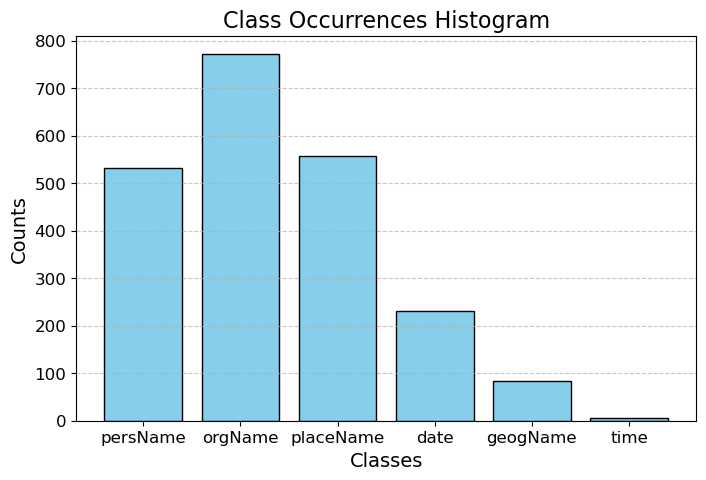

In [38]:
classes = list(class_count_dict.keys())
counts = list(class_count_dict.values())

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.bar(classes, counts, color='skyblue', edgecolor='black')
plt.title('Class Occurrences Histogram', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [39]:
def count_entities(column):
    entity_type_counters = {}  # Dictionary to hold counters for each entity type
    for value in column:
        if value:  # Skip empty or None values
            # Extract entities (1st element is the entity, 2nd is the entity type)
            for entity, entity_type in value:
                if entity_type not in entity_type_counters:
                    entity_type_counters[entity_type] = Counter()
                entity_type_counters[entity_type][entity] += 1
    return entity_type_counters

entities_count_dict = count_entities(df_1000['expressions_spacy'])

# Display the 10 most frequent entities for each type
for entity_type, counter in entities_count_dict.items():
    print(f"Top 10 entities for type '{entity_type}':")
    for entity, count in counter.most_common(10):
        print(f"  {entity}: {count}")
    print("-" * 40)

Top 10 entities for type 'persName':
  Amazon: 11
  Vanguard: 10
  Trump: 9
  Wyklucz: 8
  Bitcoin: 7
  Linkedin: 7
  Huawei: 7
  BUM: 5
  Walmart: 4
  Fed: 4
----------------------------------------
Top 10 entities for type 'orgName':
  IRA: 68
  ETF: 32
  Apple: 21
  Roth: 16
  HSA: 13
  LLC: 12
  Roth IRA: 12
  Microsoft: 11
  PE: 10
  S&P: 10
----------------------------------------
Top 10 entities for type 'placeName':
  USA: 97
  amerykański: 69
  Stany Zjednoczone: 32
  Indie: 25
  Kanada: 15
  Wielki Brytania: 9
  angielski: 8
  Ameryka: 8
  chiński: 8
  Francja: 7
----------------------------------------
Top 10 entities for type 'date':
  1040: 13
  2008 rok: 10
  2011 rok: 7
  2012 rok: 7
  grudzień: 7
  2015 rok: 7
  2016 rok: 7
  2017 rok: 6
  2014 rok: 6
  1099: 5
----------------------------------------
Top 10 entities for type 'geogName':
  europejski: 8
  Europa: 6
  Apple: 2
  Circuit City: 2
  Azja: 2
  Bliski Wschód: 2
  Airbnb: 2
  Wall St .: 2
  EBIT: 2
  Inżyniero

In [44]:
sentence_with_more_classes = []
for index, row in df_1000.iloc[100:].iterrows():
    document = row['text']
    doc = nlp(row['text_lemmat'])
    selected_sentences = [sent.text for sent in doc.sents if len(set([ent.label_ for ent in sent.ents])) > 1]
    sentence_with_more_classes.extend(selected_sentences)
    if len(sentence_with_more_classes) ==5:
      break

In [46]:
sentence_with_more_classes

['myśleć , że State Farm lub Allstate chcieć to zrobić ?',
 'zapotrzebowanie na kariera STEM w 2020 rok wzrosnąć w stosunek do dzisiejszy potrzeba o około 50 % ( departament , 2015 ) .',
 'edukacja STEM być ważny w konkurencyjny gospodarka światowy , a Stany Zjednoczone pozostawać w tyle w kształceniu młodzież .',
 'odwiedź strona http://www.techjoyntfranchise.com/ , aby znaleźć edukacja wyznaczoną przez STEM w Stany Zjednoczone .',
 'zgodnie z raport US Energy Information Administration z 2015 rok . , ponad 50 % wszystek dotacja ( 15 miliard dolar z zaledwie 30 miliard dolar ) być przeznaczyć na odnawialny źródło energia , podczas gdy wytwarzać się mniej niż 15 % energia , a energia słoneczny stanowić aż 0,005 % ( w zaokrąglenie ) .']

In [50]:
def display_sentence(sentence):
    doc = nlp(sentence)
    displacy.render(doc, style="ent", jupyter=True)

In [51]:
for elem in sentence_with_more_classes:
    display_sentence(elem)

# Wnioski

Ciekawe proste szybkie i wartościowe ćwiczenie, własna implementacja + dobry gotowiec. Idealne połączenie na laby. Wyniki ze spacy wychodzą bardzo dobre, lematyzer do języka Polskiego szokująco dobry. Rozwiązanie zakodzone własnoręcznie, no ma dużo wad, pomijamy pierwsze słowo a wydaje mi się, że ono dośc często mimoo wszystko jest właśnie named entity. Spacy bardzo przejrzyste i przyjemne w obsłudze. Spacy działa szybko, miła odskocznia od modelu neurnowoych. Dokumentacja dobra i wiele wbudowanych funckcji. Same NERy inticyjnie proste do zrozumienia, proste do używania ze spacy, widac w tym potencjał i wiele praktycznych zastosowań. Jedno z lepszych ćwiczeń jak do tej pory. Przed kursem, nie wiedizałem o czymś takim jak NER, teraz jest to proste i zrozumiałe dodatkowo wiem, jak można skorzystac z gotowej libki żeby odrazu używać. 


Which of the method (counting expressions with capital letters vs. NER) worked better for the task concerned with identification of the proper names?
Wiadomo, że NER, zliczanie jest zbyt naiwne dodatkowo pomijamy pierwsze słowo. W wynikach dominuje "Twoich" i "Ciebie" to nie są EN. NER dał zancznie lepsze wyniki, jednak zakodzenie naiwnego podejścia daje jakieś tam wstepne wyniki, pomaga zrozumieć działanie całego algorytmu i uświadamia o jak wielu przypadkach szczególnych trzeba pamiętać. 
What are the drawbacks of the method based on capital letters?
Pomijamy pierwsze słowa, zwroty grzecznościowe są wliczane do EN oraz takie słowa jak "Ciebie".
What are the drawbacks of the method based on NER?
Trzeba doczytać dokumentacje, chyba trochę dużej się liczyło.
Which of the coarse-grained NER groups has the best and which has the worst results? Try to justify this observation.
Time - najbardziej ustrukturyzowane, dużo bardziej niż np nazwy firm czy nazwy miejsce
Do you think NER is sufficient for identifying different occurrences of the same entity (i.e. consider "USA" and "Stany Zjednoczone" and "Stany Zjednoczone Ameryki Północnej")? If not, can you suggest an algorithm or a tool that would be able to group such names together?
Może mieć problemy, na pewno pomoże mu lematyzacja. Jednak sam podstawowy NER nie połączy raczej USA ze Stanami Zjednonoczymi, można by tutaj wprowadzić mapę i mapowac te 'różne' słowa na to samo (hard coding) lub użyć modelu ML w celu 'rozumienia' tych dwóch zwrotów jako równoważnych.
Can you think of a real world problem that would benefit the most from application of Named Entity Recognition algorithm?
Rekomendacje, można by wyciągac np z artykułów nazwy firm o jakich czyta użytkownik i sugerowac mu inne artykuły o tych samych nazwach firm. Lub o ludziach, czy jakakolwkiem EN by nas interesowała do polecenia.